In [1]:
# Basics of Python
import numpy as np
import matplotlib.pyplot as plt

# Set seed of random number generator
CWID = -1 # Place here your Campus wide ID number, this will personalize
#your results, but still maintain the reproducibl nature of using seeds.
personal = CWID % 10000
np.random.seed(personal)

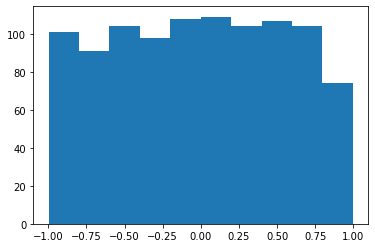

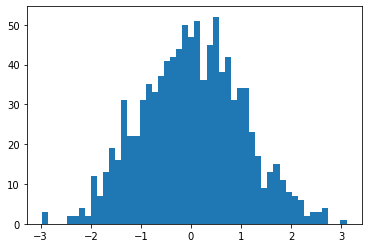

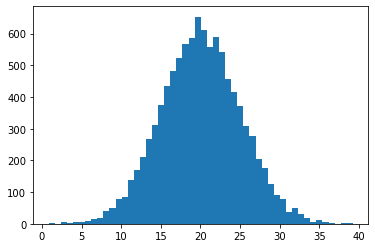

20.03134898504953
5.016979374675258
25.170082045916942


In [2]:
# Generate uniform random numbers between -1 and 1
x = np.random.uniform(low=-1,high=1,size=1000)
plt.hist(x)
plt.show()

# Generate standard normal random numbers
x = np.random.normal(loc=0,scale=1,size=1000)
# Draw a histogram with 50 bins
plt.hist(x,bins=50)
plt.show()

# Change the mean/variance
x = np.random.normal(loc=20,scale=5,size=10000) # loc = mean; scale = standard deviations
plt.hist(x,bins=50)
plt.show()

# Compute the sample mean and standard deviations
print(np.mean(x))
print(np.std(x))
print(np.var(x))
# Do these values make sense?

In [3]:
# Vectors + Loops + sampling
# Take out 25 random samples of 500 observations each (with replacement)
mu = np.zeros(25)
for i in range(0,25): #Note that Python likes to index starting at 0
    mu[i] = np.mean(np.random.choice(x,size=500,replace=True)) #Sample 500 observations from x (with replacement)
#Calculate the mean of the sample means and the standard deviation of the sample means
print(np.mean(mu))
print(np.std(mu))

# Compare with central limit theorem
# Mean = 20
# Standard deviation = sigma/sqrt(n) = 5/sqrt(500) = 0.2236

20.03990779882957
0.23483437745566654


In [4]:
# Create a vector of values from 1 to 50
# Directly:
x = range(1,51)
print(x)

x = np.arange(1,51)
print(x)

# Loops:
# For loops:
x = np.zeros(50)
for i in range(0,50):
    x[i] = i+1 #Remember Python indexes starting at 0
print(x)

# While loops:
x = np.zeros(50)
i = 0
while i < 50:
    x[i] = i+1
    i = i+1
print(x)


# If statements:
if len(x) > 100:
    print('Length > 100')
elif len(x) > 50:
    print('Length > 50')
else:
    print('Length <= 50')

range(1, 51)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
Length <= 50


In [5]:
# Download data sets: "fakedataeasy.csv"
import pandas as pd

df = pd.read_csv("fakedataeasy.csv")
print(df)
# Find the mean and standard deviation of the variables
print(df.mean())
print(df.std())

                  y         x5            x6          x7           x8
0     359685.430622  10.198039  78366.332862  260.142740  2852.492494
1     300760.584784  10.392305  65462.748866  231.006572  2706.306583
2     283085.369011  10.099505  61782.076058  469.514843  2293.194433
3     232826.292560  10.295630  50743.565881  481.803570  2396.048325
4     312396.779923   9.949874  67930.956127   10.460349  2647.687317
...             ...        ...           ...         ...          ...
4995  294148.729025   9.848858  64084.277600  218.375368  2357.844081
4996  255002.695735  10.583005  55458.569253   93.623365  2296.358551
4997  342123.079949   9.433981  74436.694226    8.519681  2706.392971
4998  300364.892170  10.295630  65362.943934  120.933338  2548.554138
4999  331949.419257   9.746794  72342.317624  382.468550  2828.684232

[5000 rows x 5 columns]
y     287330.036846
x5         9.988701
x6     62557.629539
x7       221.877993
x8      2507.561831
dtype: float64
y     36017.433160
x

In [9]:
# Download financial data:
from pandas_datareader.data import DataReader
import yfinance
from datetime import datetime

myData = yfinance.download(["IBM","MSFT"],datetime(2018,1,1),datetime(2021,12,31)) #IBM and Microsoft chosen at random
#myData = DataReader(["IBM","MSFT"],"yahoo",datetime(2018,1,1),datetime(2021,12,31)) 
print(myData)

IBM = myData["Adj Close"]["IBM"]
MSFT = myData["Adj Close"]["MSFT"]
rIBM = np.log(IBM) - np.log(IBM.shift(1)) # Daily log return
rMSFT = np.log(MSFT) - np.log(MSFT.shift(1))

# Create a data frame
df = pd.DataFrame({'IBM': rIBM,'MSFT': rMSFT})
print(df)

# Find the mean and standard deviation of daily returns
print(df.mean())
print(df.std())

[*********************100%***********************]  2 of 2 completed
             Adj Close                   Close                    High  \
                   IBM        MSFT         IBM        MSFT         IBM   
Date                                                                     
2018-01-02  116.036736   80.940369  147.466537   85.949997  148.001907   
2018-01-03  119.226341   81.317078  151.520081   86.349998  152.782028   
2018-01-04  121.641098   82.032791  154.588913   87.110001  155.181641   
2018-01-05  122.235367   83.049843  155.344162   88.190002  155.736145   
2018-01-08  122.972610   83.134575  156.281067   88.279999  156.701721   
...                ...         ...         ...         ...         ...   
2021-12-23  124.457581  331.583038  130.630005  334.690002  130.960007   
2021-12-27  125.400795  339.270996  131.619995  342.450012  131.649994   
2021-12-28  126.363075  338.082123  132.630005  341.250000  133.220001   
2021-12-29  127.049065  338.775604  133.350